<a href="https://colab.research.google.com/github/faheeem3269/Tensorflow_functional_api/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset download link https://www.kaggle.com/datasets/enesumcu/car-and-truck

In [1]:
import zipfile
zipfile_ext=zipfile.ZipFile("archive.zip")
zipfile_ext.extractall()
zipfile_ext.close()

In [2]:
import tensorflow as tf
import os
import shutil

In [3]:
new_train_folder="Datasets/train"
new_test_folder="Datasets/test"
os.makedirs(new_train_folder,exist_ok=True
            )
os.makedirs(new_test_folder,exist_ok=True)


In [4]:
new_train_folder="Datasets/test/car"
new_test_folder="Datasets/test/truck"
os.makedirs(new_train_folder,exist_ok=True
            )
os.makedirs(new_test_folder,exist_ok=True)

In [ ]:
new_train_folder="Datasets/test/car"
new_test_folder="Datasets/test/truck"
os.makedirs(new_train_folder,exist_ok=True
            )
os.makedirs(new_test_folder,exist_ok=True)

Splitting 20 percent data into testing and 80 percent into training


In [5]:
source_dir = 'Datasets/train/truck'
destination_dir = 'Datasets/test/truck'

# Create destination folder if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Get sorted list of files in the source directory
all_files = sorted([
    f for f in os.listdir(source_dir)
    if os.path.isfile(os.path.join(source_dir, f))
])

# Calculate number of files to move (bottom 20%)
num_to_move = int(0.2 * len(all_files))
files_to_move = all_files[-num_to_move:]  # take last 20%

# Move the files
for file_name in files_to_move:
    src = os.path.join(source_dir, file_name)
    dst = os.path.join(destination_dir, file_name)
    shutil.move(src, dst)

print(f"Moved {num_to_move} files from the bottom of the list.")

Moved 79 files from the bottom of the list.


In [6]:
source_dir = 'Datasets/train/car'
destination_dir = 'Datasets/test/car'

# Create destination folder if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Get sorted list of files in the source directory
all_files = sorted([
    f for f in os.listdir(source_dir)
    if os.path.isfile(os.path.join(source_dir, f))
])

# Calculate number of files to move (bottom 20%)
num_to_move = int(0.2 * len(all_files))
files_to_move = all_files[-num_to_move:]  # take last 20%

# Move the files
for file_name in files_to_move:
    src = os.path.join(source_dir, file_name)
    dst = os.path.join(destination_dir, file_name)
    shutil.move(src, dst)

print(f"Moved {num_to_move} files from the bottom of the list.")

Moved 78 files from the bottom of the list.


In [7]:
train_dir_veh="Datasets/train"
test_dir_veh="Datasets/test"

In [8]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_veh,
                                                                image_size=(244,244),
                                                                label_mode="binary",
                                                                batch_size=32,
                                                                               )

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir_veh,
                                                              image_size=(244,244),
                                                              label_mode="binary",
                                                              batch_size=32,
                                                              )

Found 631 files belonging to 2 classes.
Found 157 files belonging to 2 classes.


In [9]:
print(train_data.class_names)

['car', 'truck']


In [10]:
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
input=tf.keras.layers.Input(shape=(244,244,3), name="input_layer")
x =tf.keras.layers.Rescaling(1./255)(input)
x=base_model(input)

x=tf.keras.layers.GlobalAveragePooling2D()(x)
output=tf.keras.layers.Dense(1,activation="sigmoid")(x)
vehicel_model = tf.keras.Model(input, output)

# 9. Compile the model
vehicel_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = vehicel_model.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=len(test_data),
                                 # Track our model's training logs for visualization later
                                 #callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
                                 )

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7060 - loss: 0.6199 - val_accuracy: 0.9299 - val_loss: 0.3211
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9010 - loss: 0.3420 - val_accuracy: 0.9427 - val_loss: 0.2171
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9480 - loss: 0.2340 - val_accuracy: 0.9363 - val_loss: 0.1809
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9407 - loss: 0.2066 - val_accuracy: 0.9363 - val_loss: 0.1653
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9285 - loss: 0.2016 - val_accuracy: 0.9363 - val_loss: 0.1576


In [13]:
import matplotlib.pyplot as plt


In [14]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


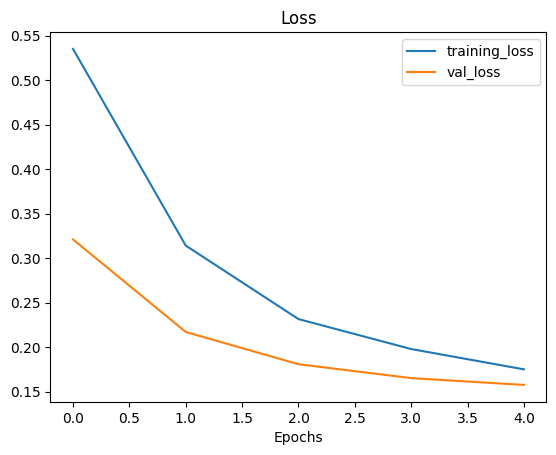

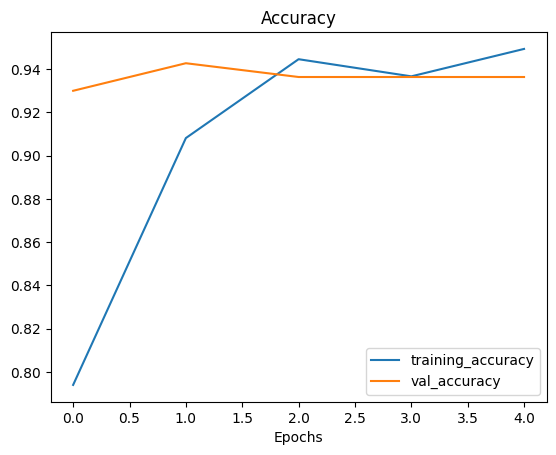

In [15]:
plot_loss_curves(history_10_percent)

In [16]:
vehicle_class_name=train_data.class_names
vehicle_class_name

['car', 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted: truck)


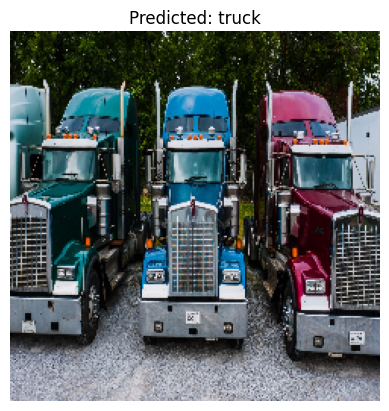

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'truck3.jpg'
img = image.load_img(img_path, target_size=(244, 244, 3))  # height, width, channels
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 3)

pred1 = vehicel_model.predict(img_array)  # shape: (1, num_classes)

# if it's binary classification (1 output unit):
if pred1>= 0.5:
    predicted_class_index1 = 1
else:
    predicted_class_index1 = 0

name=vehicle_class_name[predicted_class_index1]
print(f"Predicted: {vehicle_class_name[predicted_class_index1]})")
# Optional: Show the image
plt.imshow(img)
plt.title(f"Predicted: {vehicle_class_name[predicted_class_index1]}")
plt.axis(False)
plt.show()
